# IML Assignment 1

## Name: Damir Abdulayev
## mail: d.abdulayev@innopolis.university

## Task 1

### Linear Regression
#### Data reading & plotting

In [167]:
import pandas as pd
#read the csv file
df = pd.read_csv("task1_data.csv")
df

,X_train,y_train,X_test,y_test
0,0.136018,-0.129555,0.000000,0.000000
1,0.207231,0.894330,0.172414,0.270000
2,0.246135,-0.791176,0.344828,0.535057
3,0.298175,0.180217,0.517241,0.790317
4,0.635941,3.722585,0.689655,1.031108
5,0.944209,0.693082,0.862069,1.253020
6,0.961715,-0.196149,1.034483,1.451991
7,1.089511,1.960637,1.206897,1.624378
8,1.204234,2.063510,1.379310,1.767024
9,2.196011,1.404661,1.551724,1.877318


In [168]:
#Split the data into train and test sets
X_train, y_train, X_test, y_test = pd.DataFrame(df.iloc[:, 0]), df.iloc[:, 1], pd.DataFrame(df.iloc[:, 2]), df.iloc[:, 3]

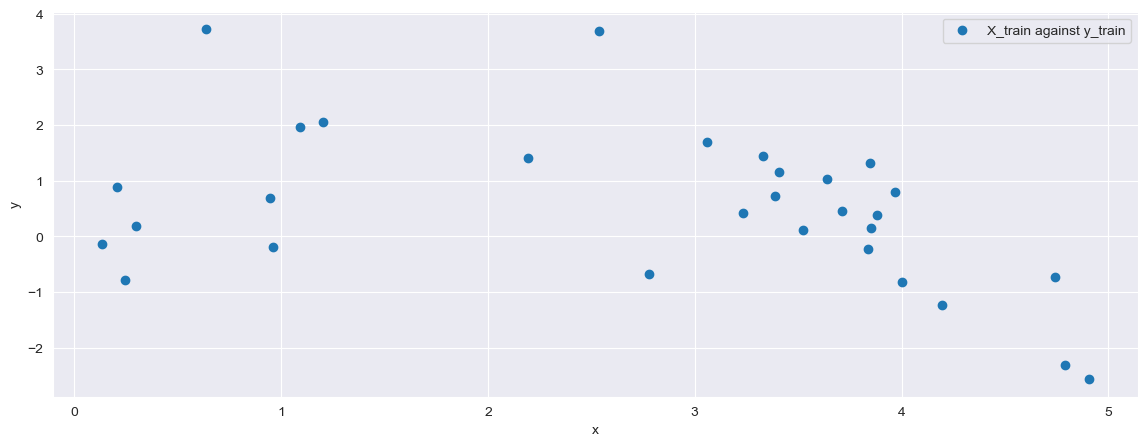

In [169]:
import matplotlib.pyplot as plt

#Scatter plot for train set:
plt.figure(figsize=(14, 5))

plt.xlabel("x")
plt.ylabel("y")

plt.scatter(X_train, y_train, label="X_train against y_train")

plt.legend(loc="best")
plt.show()

#### Linear regression model fitting

In [170]:
from sklearn.linear_model import LinearRegression
import numpy as np

#Training the linear regression model
reg = LinearRegression().fit(X_train, y_train)
#Then we can predict the y values for the test set
y_pred_lr = reg.predict(X_test)

/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- X_test
Feature names seen at fit time, yet now missing:
- X_train

  warnings.warn(message, FutureWarning)


#### Linear regression model prediction & Evaluation


In [171]:
from sklearn import metrics

#print_metrics function print the metrics of the model: MAE, MSE, RMSE, R2
def print_metrics(y_actual, y_pred):
    mae = metrics.mean_absolute_error(y_actual, y_pred)
    mse = metrics.mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_actual, y_pred)
    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)

In [172]:

print_metrics(y_test, y_pred_lr)

Results of sklearn.metrics:
MAE: 0.7837610302414408
MSE: 0.78105677092199
RMSE: 0.8837741628504365
R2: 0.2609450135378707


#### Plotting original data and prediction


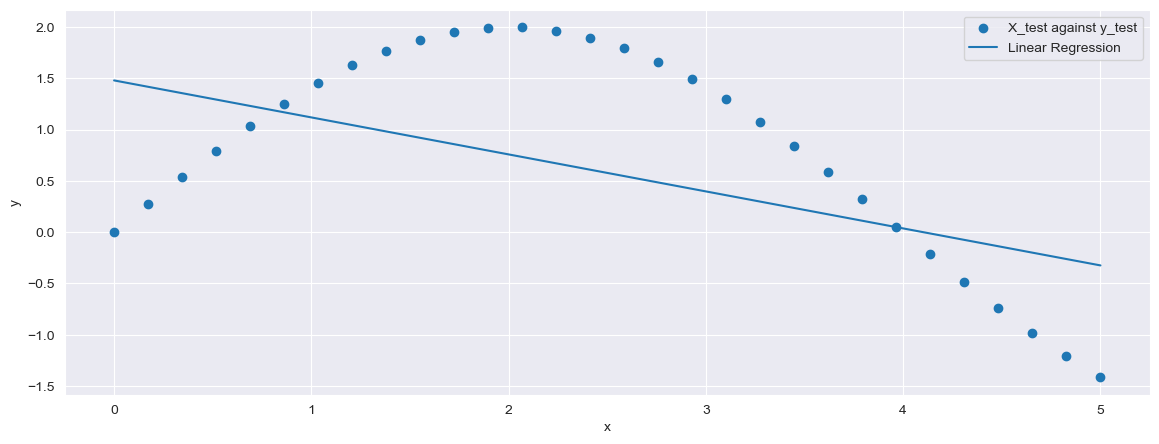

In [173]:
import matplotlib.pyplot as plt

#Plot linear regression model against the test data
plt.figure(figsize=(14, 5))


plt.xlabel("x")
plt.ylabel("y")

plt.scatter(X_test, y_test, label="X_test against y_test")
plt.plot(X_test, y_pred_lr, label="Linear Regression")

plt.legend(loc="best")
plt.show()

### Did the linear regression model give a good fit? Elaborate your answer
##### No it didn't. The model is not able to fit the data well. Linear model is not able to capture the non-linear relationship between the features and the target variable. We can say this not only by looking at the chart above, but also by analyzing the metrics that we got

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [174]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [175]:
#Create pipeline with polynomial features and linear regression
pipeline = Pipeline([('features', PolynomialFeatures()), ('lr', LinearRegression())])
#Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features', PolynomialFeatures()), ('lr', LinearRegression())])

#### Tuning the degree hyper-parameter using GridSearch

In [176]:
from sklearn.model_selection import GridSearchCV

#Set the parameters for the grid search
degrees = np.arange(2,10)
parameters = {'features__degree': degrees}

search = GridSearchCV(pipeline, parameters, cv=8, scoring='neg_mean_squared_error')
#Search for the best degree
search.fit(X_train, y_train)

#Print the best degree
print("Best parameter (CV score=%0.3f):", search.cv_results_["mean_test_score"][search.best_index_], search.best_params_)
print()

Best parameter (CV score=%0.3f): -1.0783084797230351 {'features__degree': 2}



In [177]:
#Train on the best degree
y_pred = pipeline.predict(X_test)
#Print the metrics for the model with the best degree
print_metrics(y_test, y_pred)

Results of sklearn.metrics:
MAE: 0.15213273421671683
MSE: 0.08205877217937978
RMSE: 0.28645902356075253
R2: 0.9223539862658874


/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- X_test
Feature names seen at fit time, yet now missing:
- X_train

  warnings.warn(message, FutureWarning)


#### Manually finding the best degree

In [178]:
from sklearn.model_selection import cross_val_score
#Setting best score to small number
best_score = -9999999
#Looping through the degrees
for i in parameters["features__degree"]:
    pipeline.set_params(features__degree=i)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    scores = cross_val_score(pipeline, X_train, y_train, cv=8, scoring="neg_mean_squared_error")
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_degree = i
#Print the best degree and the best score
print("Best degree:", best_degree)
print("Negative mean squared error:", best_score)

Best degree: 2
Negative mean squared error: -1.0783084797230351


/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- X_test
Feature names seen at fit time, yet now missing:
- X_train

  warnings.warn(message, FutureWarning)
/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- X_test
Feature names seen at fit time, yet now missing:
- X_train

  warnings.warn(message, FutureWarning)
/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- X_test
Feature names seen at fit time, yet

#### Plotting the test data and the best degree polynomial model

/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- X_test
Feature names seen at fit time, yet now missing:
- X_train

  warnings.warn(message, FutureWarning)


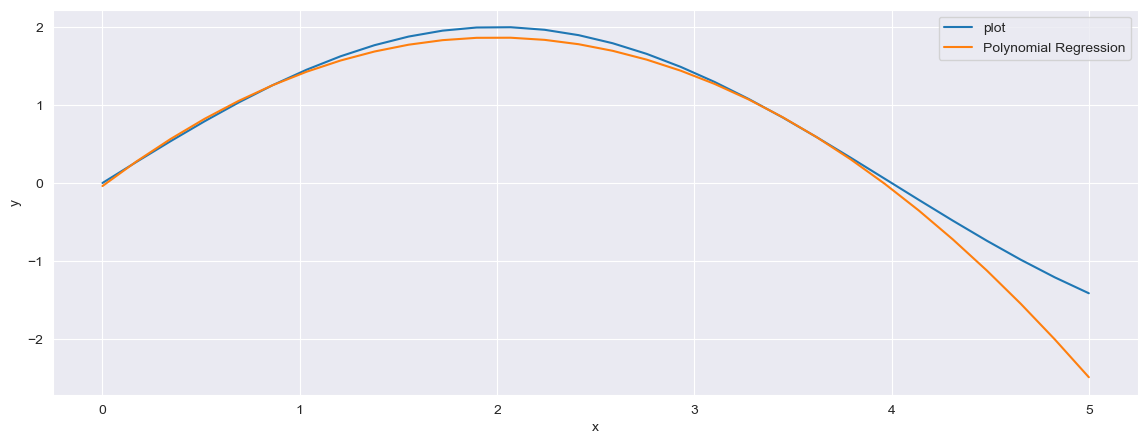

In [179]:
plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, label="plot")

plt.xlabel("x")
plt.ylabel("y")

#Plot the best degree polynomial model
pipeline.set_params(features__degree=2)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
plt.plot(X_test, y_pred, label="Polynomial Regression")

plt.legend(loc="best")
plt.show()

## Task 2

### Data processing
#### Loading the dataset

In [180]:
import pandas as pd
#Read the dataset
df = pd.read_csv("pokemon_modified.csv")
df.head(100)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,60,Drowzee,50.0,psychic,43,90,42,32.4,1,0
96,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,85,Hypno,50.0,psychic,73,115,67,75.6,1,0
97,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,30,Krabby,50.0,water,25,25,50,6.5,1,0
98,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,55,Kingler,50.0,water,50,50,75,60.0,1,0


#### Remove the 2 redundant features

In [181]:
#This 2 features are not needed for the model, because they are not numeric and they are not related to the target variable
y = df["is_legendary"]
X = df.drop(columns=["name", "classification", "is_legendary"])

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [182]:
from sklearn.model_selection import train_test_split
#Split the data using variables above
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y, test_size=0.2)

## Check if the dataset is balanced or not and comment on it:
##### Dataset is not balanced, because there are 10 times more non-legendary pokemons than legendary ones

In [183]:
#Check the distribution of the target variable to confirm that the dataset is not balanced
y_train.value_counts()

0    584
1     56
Name: is_legendary, dtype: int64

#### Exploring the dataset and checking for missing values

In [184]:
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

#### Impute the missing values

In [186]:
from sklearn.impute import SimpleImputer

#Impute the missing values using the most frequent value
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
imputer.fit(X_test)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#### Double check that there are no missing values

In [187]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   against_bug        640 non-null    object
 1   against_dark       640 non-null    object
 2   against_dragon     640 non-null    object
 3   against_electric   640 non-null    object
 4   against_fairy      640 non-null    object
 5   against_fight      640 non-null    object
 6   against_fire       640 non-null    object
 7   against_flying     640 non-null    object
 8   against_ghost      640 non-null    object
 9   against_grass      640 non-null    object
 10  against_ground     640 non-null    object
 11  against_ice        640 non-null    object
 12  against_normal     640 non-null    object
 13  against_poison     640 non-null    object
 14  against_psychic    640 non-null    object
 15  against_rock       640 non-null    object
 16  against_steel      640 non-null    object
 1

In [188]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   against_bug        161 non-null    object
 1   against_dark       161 non-null    object
 2   against_dragon     161 non-null    object
 3   against_electric   161 non-null    object
 4   against_fairy      161 non-null    object
 5   against_fight      161 non-null    object
 6   against_fire       161 non-null    object
 7   against_flying     161 non-null    object
 8   against_ghost      161 non-null    object
 9   against_grass      161 non-null    object
 10  against_ground     161 non-null    object
 11  against_ice        161 non-null    object
 12  against_normal     161 non-null    object
 13  against_poison     161 non-null    object
 14  against_psychic    161 non-null    object
 15  against_rock       161 non-null    object
 16  against_steel      161 non-null    object
 1

#### Encode categorically

In [189]:
#Encode the categorical features
X_train = pd.get_dummies(X_train, columns=["type1"])

In [190]:
X_test = pd.get_dummies(X_test, columns=["type1"])

In [191]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   against_bug        161 non-null    object
 1   against_dark       161 non-null    object
 2   against_dragon     161 non-null    object
 3   against_electric   161 non-null    object
 4   against_fairy      161 non-null    object
 5   against_fight      161 non-null    object
 6   against_fire       161 non-null    object
 7   against_flying     161 non-null    object
 8   against_ghost      161 non-null    object
 9   against_grass      161 non-null    object
 10  against_ground     161 non-null    object
 11  against_ice        161 non-null    object
 12  against_normal     161 non-null    object
 13  against_poison     161 non-null    object
 14  against_psychic    161 non-null    object
 15  against_rock       161 non-null    object
 16  against_steel      161 non-null    object
 1

#### Scale the data

In [192]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
#Scale using MinMaxScaler because it is more robust to outliers and it is not affected by the distribution of the data
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.2,0.200000,0.5,0.250,0.200000,0.500,0.066667,0.066667,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,0.2,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.2,0.200000,0.5,0.000,0.200000,0.125,0.466667,0.466667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Confusion Matrix

## Are there highly co-related features in the dataset? Is it a problem?
##### Yes, there are highly correlated features in the dataset. It can lead to overfitting and decrease the accuracy of the model, but there are not many of them, so it is not a big problem.

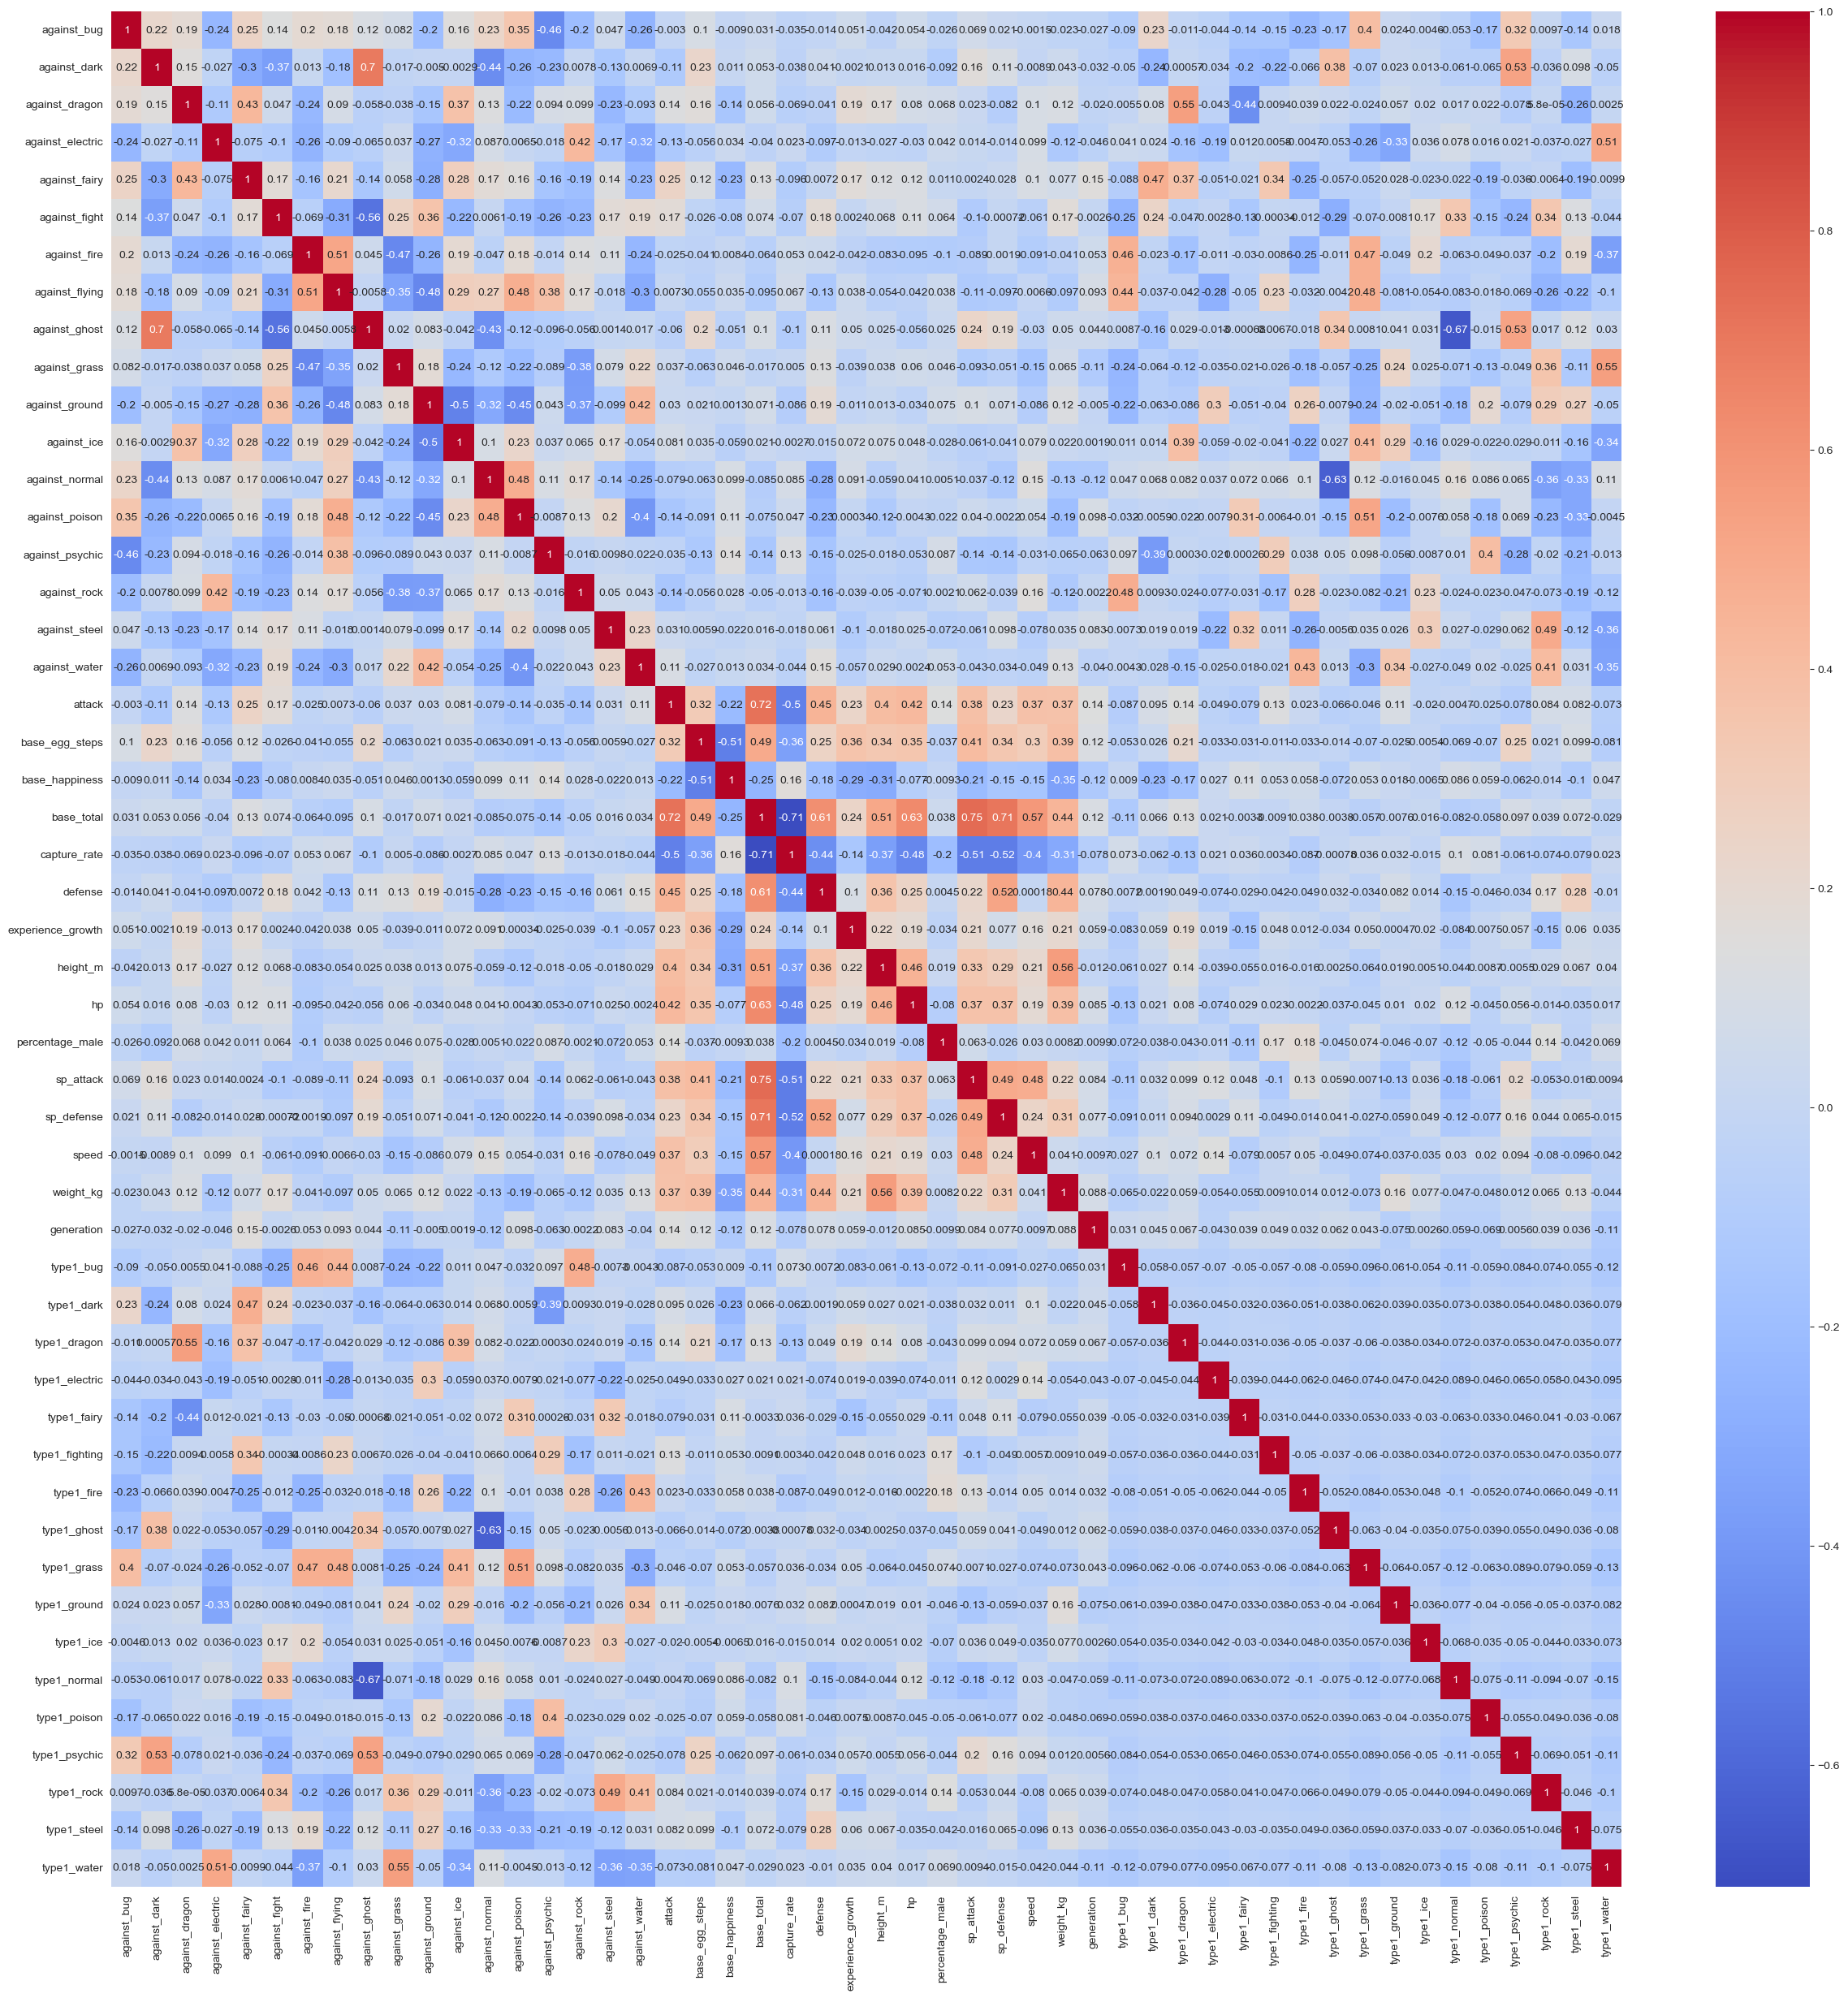

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
#Plot the correlation matrix
plt.figure(figsize=(30, 30))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap = "coolwarm")
plt.show()

### Model fitting and Comparison

#### Tuning LR model

In [194]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Function to print the metrics for clf
def print_clf_metrics( y_actual, y_pred ):
    print(f'Accuracy={accuracy_score(y_actual, y_pred)}')
    print(f'Precision={precision_score(y_actual, y_pred)}')
    print(f'Recall={recall_score(y_actual, y_pred)}')
    print(f'f1={f1_score(y_actual, y_pred)}')

In [195]:
parameters = {
    "penalty": ['l1', 'l2'],
    "C": np.logspace(-3, 3, 7),
    "solver": ['newton-cg', 'lbfgs', 'liblinear']
}

max_iter=1000 in LR constructor

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
#Using grid search to find the best params for the LR
gs_clf = GridSearchCV(LogisticRegression(max_iter=1000), parameters, cv=5, verbose=1, n_jobs=-1)

In [197]:
#Train the data
gs_clf.fit(X_train, y_train)
print(gs_clf.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/

In [198]:
#Get the best parameters
print("Tuned Hyperparameters :", gs_clf.best_params_)
print("Accuracy :", gs_clf.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9890625


#### Construct a LR with the best params and Evaluate the LR with the best params

In [199]:
#Build a LR with the best params
lr_clf = LogisticRegression(max_iter=1000, penalty='l1', C=10, solver='liblinear')

In [200]:
#Train the data
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

In [201]:
#Print the metrics
print_clf_metrics(y_test, y_pred)

Accuracy=0.9937888198757764
Precision=0.9333333333333333
Recall=1.0
f1=0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [202]:
#Print the top 5 most influencing features and the top 5 ignored features using the LR model
coef = pd.Series(np.abs(lr_clf.coef_[0]), index = X_train.columns)
print(coef.sort_values(ascending=False).head(5))
print(coef.sort_values(ascending=False).tail(5))

base_egg_steps       13.506058
capture_rate         10.606374
type1_normal          9.620161
base_total            7.451438
experience_growth     6.935464
dtype: float64
against_ground     0.0
against_water      0.0
against_ice        0.0
against_psychic    0.0
against_bug        0.0
dtype: float64


#### Tuning KNN model

In [203]:
from sklearn.neighbors import KNeighborsClassifier

#Using grid search to find the best params for the KNN with parameters from assignment pdf
param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

grid_search_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search_clf.fit(X_train, y_train)

#Print the best params
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

Fitting 5 folds for each of 112 candidates, totalling 560 fits


/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

Tuned Hyperparameters : {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.946875


/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [204]:
#Build a KNN with the best params
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_clf_metrics(y_test, y_pred)

Accuracy=0.9751552795031055
Precision=1.0
Recall=0.7142857142857143
f1=0.8333333333333333


/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Fitting GNB to the data and evaluating on the test dataset

In [205]:
from sklearn.naive_bayes import GaussianNB
#Build a GNB and print the metrics
gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)
y_pred = gauss_nb.predict(X_test)

print_clf_metrics(y_test, y_pred)

Accuracy=0.8695652173913043
Precision=0.4
Recall=1.0
f1=0.5714285714285715


### Which metric is most appropriate for this task and why?
##### Accuracy is bad metric, because our dataset is not balanced. We care both about false-positive and false-negative in this dataset, so it is better to use f1 metric. Also for the imbalanced dataset f1 is the most common metric to use

### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
##### Naive Bayes has the worst metrics between these three. KNN has higher precision than LR, but LR has better f1 score. So because I said earlier that f1 is the most appropriate metric, I choose LR between these three.

## Bonus Task

#### Loading the Dataset

In [206]:
import pandas as pd
#Loading the dataset
train_data = pd.read_csv('bonus_train.csv')

test_data = pd.read_csv('bonus_test.csv')

train_data

,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0
...,...,...,...,...
265,87.227771,3.738061,320.135382,2
266,-4.605994,3.688628,204.136303,1
267,44.178216,5.085936,198.365089,0
268,6.169277,3.328219,204.934675,0


In [207]:
#Splitting the data into train and test sets
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

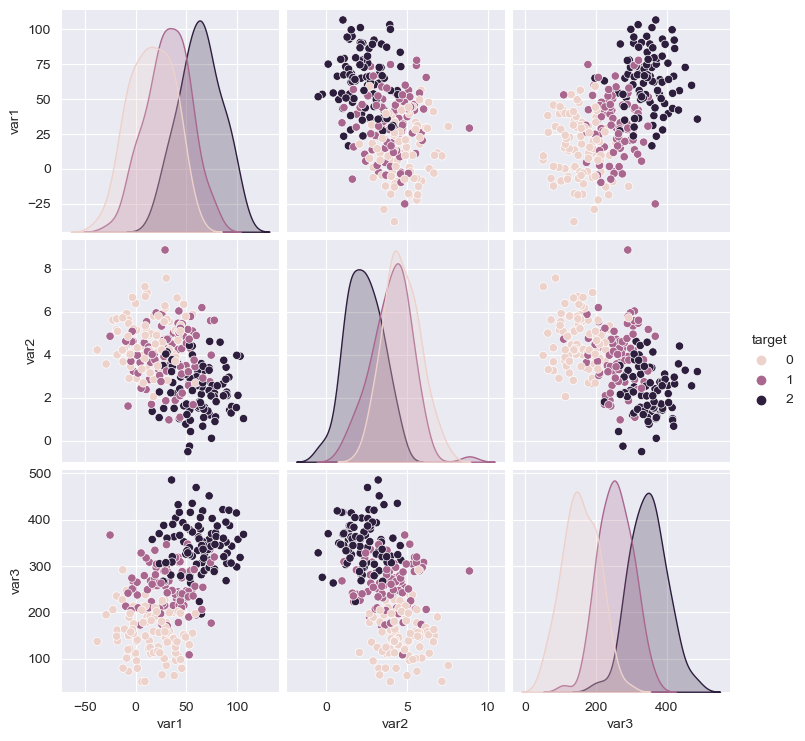

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(train_data, kind = 'scatter', hue='target')
plt.show()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [209]:
from sklearn.metrics import accuracy_score
#Fit LR using OVR and print metrics
multi_lr = LogisticRegression(multi_class='ovr')
multi_lr.fit(X_train, y_train)
y_pred = multi_lr.predict(X_test)

In [210]:
accuracy_score(y_test, y_pred)

0.8

#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [211]:
#Fit LR using multinomial and print metrics
multi_lr = LogisticRegression(multi_class='multinomial')
multi_lr.fit(X_train, y_train)
y_pred = multi_lr.predict(X_test)

/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [212]:
accuracy_score(y_test, y_pred)

0.9

#### Using gridsearch to tune the C value and multi class

In [213]:
#Using grid search to find the best params for the LR with parameters from assignment pdf
params = {
    'C': np.logspace(-10, 10,7),
    'multi_class': ['multinomial', 'ovr']
}

In [214]:
grid_search_clf = GridSearchCV(LogisticRegression(), params, cv=8, verbose=1, n_jobs=-1)

grid_search_clf.fit(X_train, y_train)

/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 8 folds for each of 14 candidates, totalling 112 fits


/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

GridSearchCV(cv=8, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['multinomial', 'ovr']},
             verbose=1)

In [215]:
#Print the best params
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'C': 4641588.833612791, 'multi_class': 'multinomial'}
Accuracy : 0.8401292335115864


In [216]:
grid_search_clf.score(X_test, y_test)

0.9

### Comment on why one multi_class technique was better than the other
##### Multinomial logistic regression is preferred when the classes are mutually exclusive, and there is no natural ordering among them. On other hand OVR is preferred in other cases. So our initial data shows that classes are indeed mutually exclusive (because we have no context) and there is no ordering among them because  3 classes do not influence each other (object with class 2 is not closer to object with class 3 than object with class 1). Another point is than multinomial give better accuracy score than OVR, so multinomial was better than OVR

#### Create LR with the best params

In [217]:
X_train = X_train.drop('var3', axis=1)
multi_lr = LogisticRegression(multi_class='multinomial', C=4641588.833612791, max_iter=1000000)
multi_lr.fit(X_train, y_train)

LogisticRegression(C=4641588.833612791, max_iter=1000000,
                   multi_class='multinomial')

#### Visualize the decision boundaries

/Users/damirabdulaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


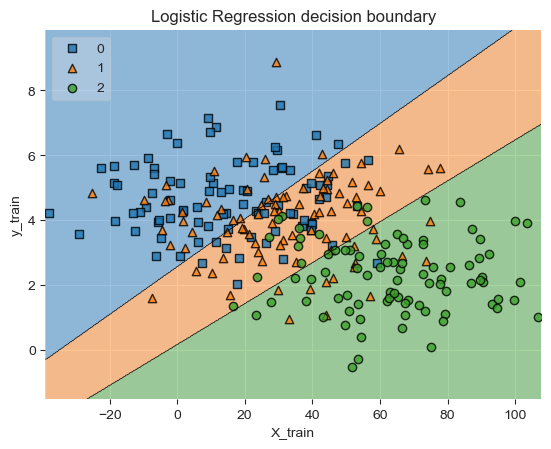

In [218]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train.values, y_train.values, clf=multi_lr, legend=2)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Logistic Regression decision boundary')
plt.show()

### Comment on the decision boundary, do you think this is a good model or not? and based on what?
##### I think this is a good model, because it has a good accuracy, and it is not overfitting. Also it has a good decision boundary, because it is has good balance between complexity and simplicity